# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [978]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [979]:
# Читаем данные

X_train = pd.read_csv('train_features_with_answers.csv')

In [980]:
# Про характеристики прочитайте в источнике

X_train.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

(_Прим_. Для clear использована стратегия замены данных случайными величинами из диапазона верных величин)

## Характеристика: "Sex"

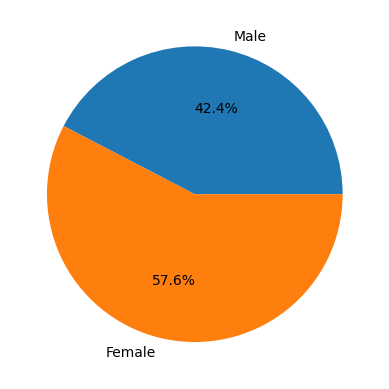

In [981]:
male_count = X_train["sex"].value_counts()["M"]
female_count = X_train["sex"].value_counts()["F"]

plt.pie([male_count, female_count], labels = ["Male", "Female"], autopct='%1.1f%%')
plt.show()

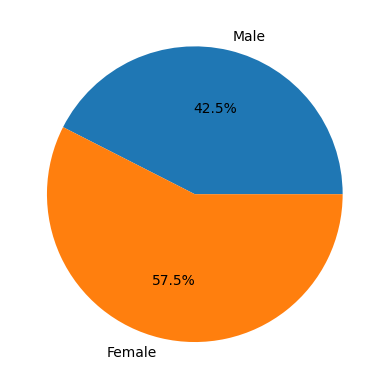

In [982]:
# clear
if len(X_train["sex"].unique()) > 2:
    odd_values = list(X_train["sex"].unique())
    odd_values.remove("M")
    odd_values.remove("F")
    for odd_sex in odd_values:
        random_sex = random.choice(["M", "F"])
        X_train_sex_clear = X_train["sex"].replace(odd_sex, random_sex)

male_count = X_train_sex_clear.value_counts()["M"]
female_count = X_train_sex_clear.value_counts()["F"]

plt.pie([male_count, female_count], labels = ["Male", "Female"], autopct='%1.1f%%')
plt.show()

## Характеристика: "Age"

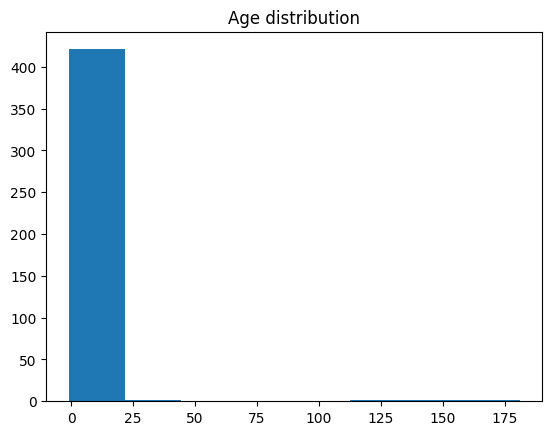

In [983]:
# X_train['age'] = X_train['age'].astype(int)
plt.hist(X_train["age"], bins=8, align='mid')
plt.title('Age distribution')
plt.show()

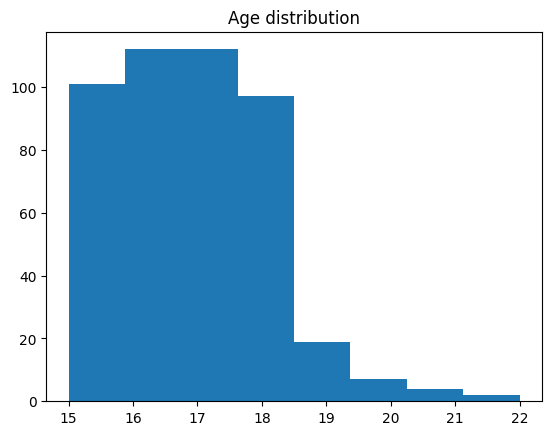

In [984]:
# clear
X_train_age_copy = X_train["age"].fillna(random.choice([15 + i for i in range(8)]))

for age in X_train_age_copy.unique():
    if age > 22 or age < 15:
        random_age = random.choice([15 + i for i in range(8)])
        X_train_age_copy = X_train_age_copy.replace(age, random_age)

X_train_age_copy = X_train_age_copy.astype(int)
plt.hist(X_train_age_copy, bins=8, align='mid')
plt.title('Age distribution')
plt.show()

## Характеристика: "Weekly study time"

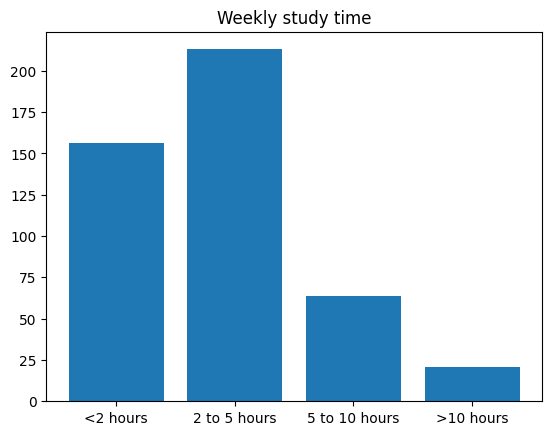

In [985]:
plt.bar(["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"], list(X_train.groupby('studytime').size()))
plt.title('Weekly study time')
plt.show()

## Характеристика: "Romantic Relationship"

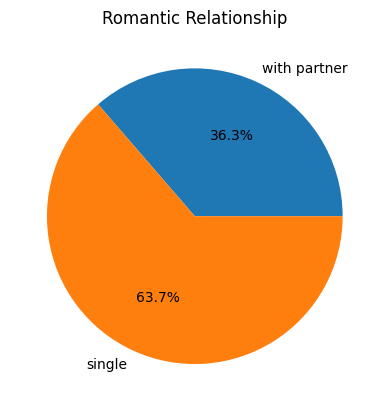

In [986]:
in_pair = X_train["romantic"].value_counts()["yes"]
single = X_train["romantic"].value_counts()["no"]

plt.pie([in_pair, single], labels = ["with partner", "single"], autopct='%1.1f%%')
plt.title('Romantic Relationship')
plt.show()

## Характеристика: "Alcohol Consumption"

In [987]:
workday_weight = 0.6
weekend_weight = 0.4
X_train["Alcohol Consumption"] = workday_weight * X_train["Dalc"] + weekend_weight * X_train["Walc"]

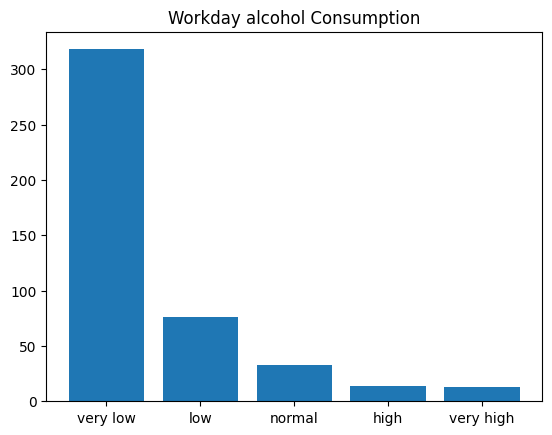

In [988]:
# workday alcohol consumption distribution
# TODO normalize data
plt.bar(["very low", "low", "normal", "high", "very high"], list(X_train.groupby(["Dalc"]).size()))
plt.title('Workday alcohol Consumption')
plt.show()

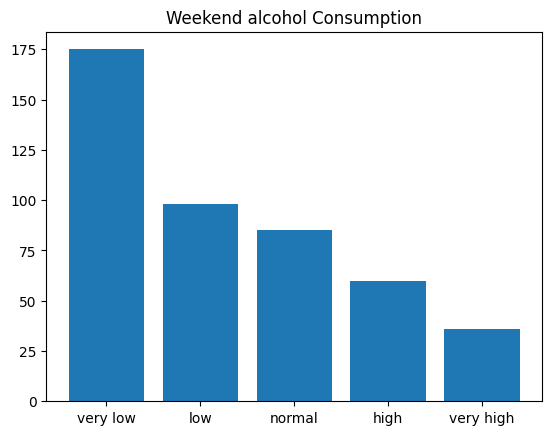

In [989]:
# weekend alcohol consumption distribution
plt.bar(["very low", "low", "normal", "high", "very high"], list(X_train.groupby(["Walc"]).size()))
plt.title('Weekend alcohol Consumption')
plt.show()

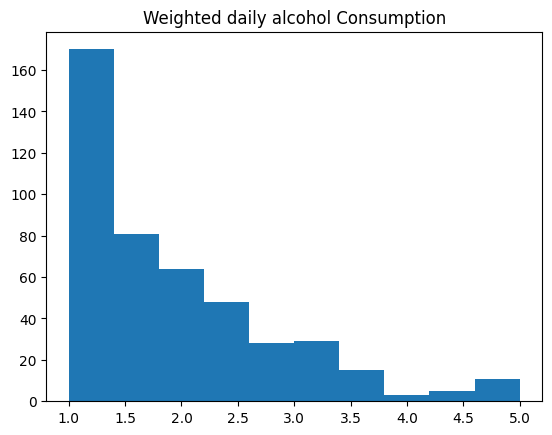

In [990]:
# weighted weekly alcohol consumption distribution
plt.hist(X_train["Alcohol Consumption"])
plt.title('Weighted daily alcohol Consumption')
plt.show()

## Целевая зависимость: "G3" (Final Grade)

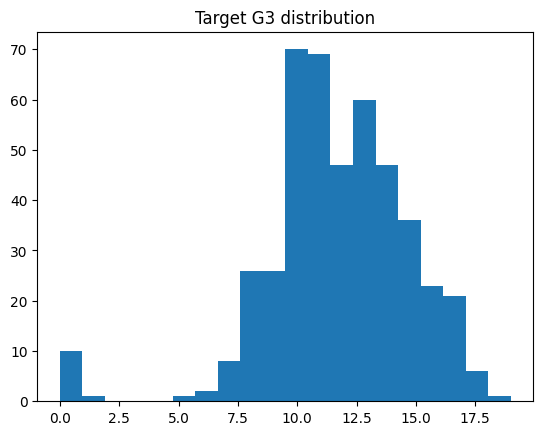

In [991]:
plt.hist(X_train["G3"], bins=20)
plt.title('Target G3 distribution')
plt.show()

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

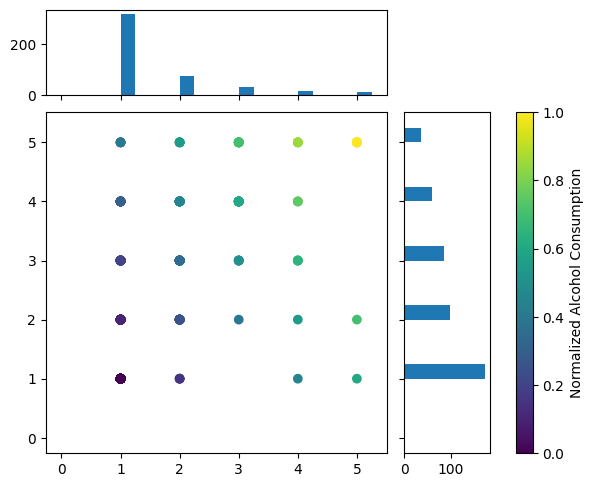

In [992]:
# union distribution of workday and weekend alcohol consumption
from matplotlib.colors import Normalize

def scatter_hist(dalc, walc, ax, ax_histx, ax_histy, colormap=None):
    """
    colormap - N-dim array, where N - dim of Dalc array (ex. Alcohol consumption)
    """
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    colormap = workday_weight * dalc + weekend_weight * walc
    # the scatter plot:
    ax.scatter(dalc, walc, c=colormap)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(dalc)), np.max(np.abs(walc)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(dalc, bins=bins)
    ax_histy.hist(walc, bins=bins, orientation='horizontal')

fig = plt.figure(layout='constrained')
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
ax.set(aspect=1)

ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
scatter_hist(X_train["Dalc"], X_train["Walc"], ax, ax_histx, ax_histy, colormap = X_train["Alcohol Consumption"])
fig.colorbar(plt.cm.ScalarMappable(),
             ax=ax, label="Normalized Alcohol Consumption")

# plt.title('Union distribution of workday and weekend alcohol consumption')
plt.show()

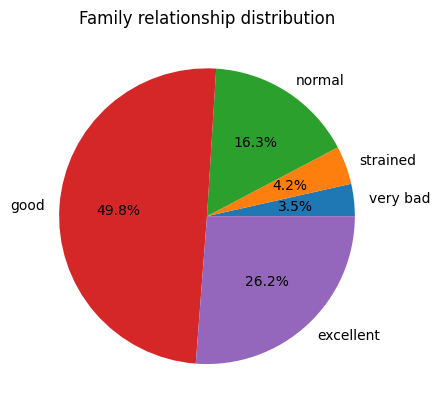

In [993]:
# family relationship distribution (as categorial)
very_bad = X_train["famrel"].value_counts()[1.0]
strained = X_train["famrel"].value_counts()[2.0]
normal = X_train["famrel"].value_counts()[3.0]
good = X_train["famrel"].value_counts()[4.0]
excellent = X_train["famrel"].value_counts()[5.0]

plt.pie(
    [very_bad, strained, normal, good, excellent], 
    labels = ["very bad", "strained", "normal", "good", "excellent"], autopct='%1.1f%%')
plt.title('Family relationship distribution')
plt.show()

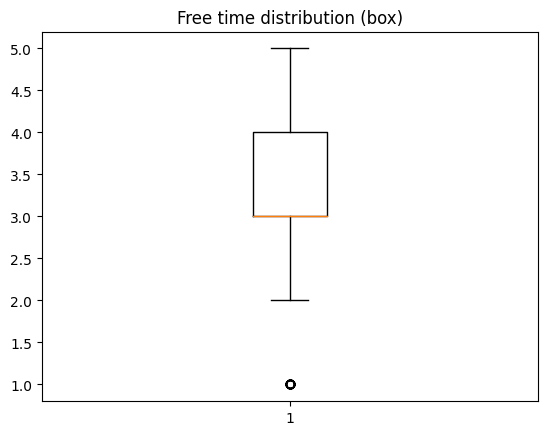

In [994]:
# free time distribution (as numeric)
plt.boxplot(X_train["freetime"])
plt.title('Free time distribution (box)')
plt.show()

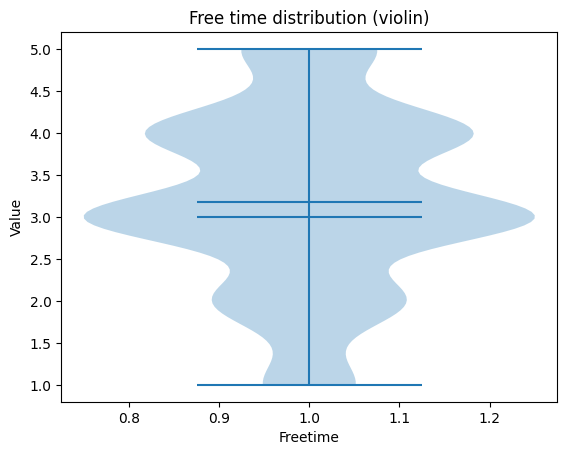

In [995]:
viplot = plt.violinplot(
    X_train["freetime"], 
    showmeans=True, 
    showmedians=True,
    showextrema=True
)
# plt.scatter(1.0, median, marker='o', color='white', s=30, zorder=3)
plt.xlabel('Freetime')
plt.ylabel('Value')
plt.title('Free time distribution (violin)')
plt.show()

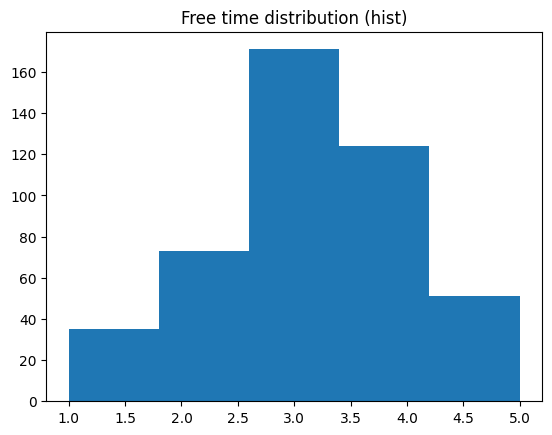

In [996]:
plt.hist(X_train["freetime"], bins=5)
plt.title('Free time distribution (hist)')
plt.show()

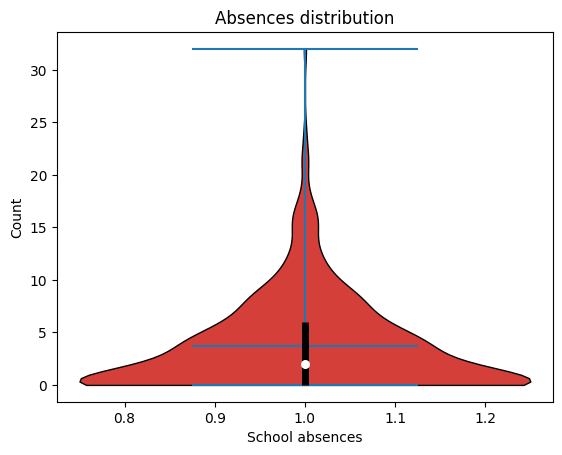

In [997]:
# absences distribution (numeric)
viplot = plt.violinplot(
    X_train["absences"], 
    showmeans=True, 
    showmedians=False,
    showextrema=True
)
viplot["bodies"][0].set_facecolor('#D43F3A')
viplot["bodies"][0].set_edgecolor('black')
viplot["bodies"][0].set_alpha(1)
quartile1, median, quartile3 = np.percentile(X_train["absences"], [25, 50, 75])
plt.scatter(1.0, median, marker='o', color='white', s=30, zorder=3)
plt.vlines(1.0, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.xlabel('School absences')
plt.ylabel('Count')
plt.title('Absences distribution')
plt.show()

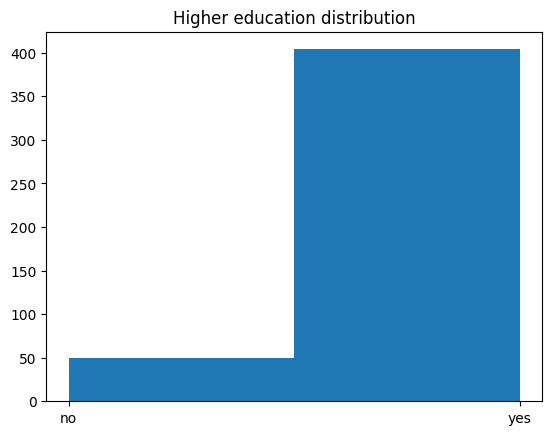

In [998]:
# higher education distribution (categorial binary)
plt.hist(X_train["higher"], bins=2)
plt.title('Higher education distribution')
plt.show()

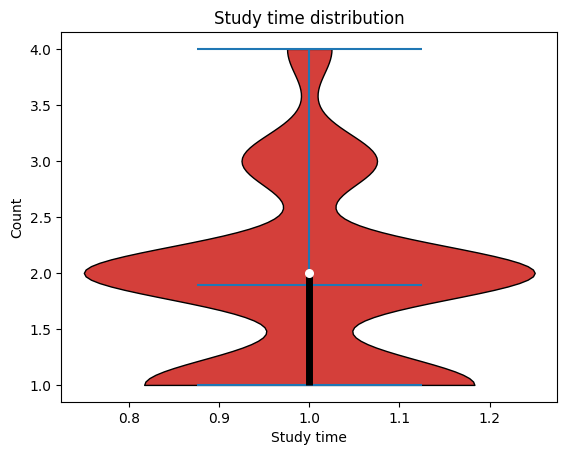

In [999]:
# Study time distribution (numeric)
viplot = plt.violinplot(
    X_train["studytime"], 
    showmeans=True, 
    showmedians=False,
    showextrema=True
)
viplot["bodies"][0].set_facecolor('#D43F3A')
viplot["bodies"][0].set_edgecolor('black')
viplot["bodies"][0].set_alpha(1)
quartile1, median, quartile3 = np.percentile(X_train["studytime"], [25, 50, 75])
plt.scatter(1.0, median, marker='o', color='white', s=30, zorder=3)
plt.vlines(1.0, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.xlabel('Study time')
plt.ylabel('Count')
plt.title('Study time distribution')
plt.show()

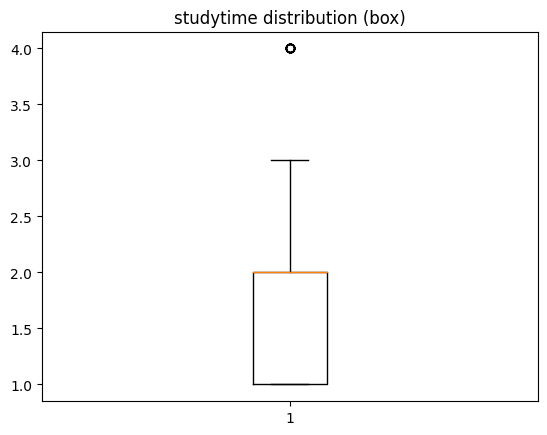

In [1000]:
plt.boxplot(X_train["studytime"])
plt.title('studytime distribution (box)')
plt.show()

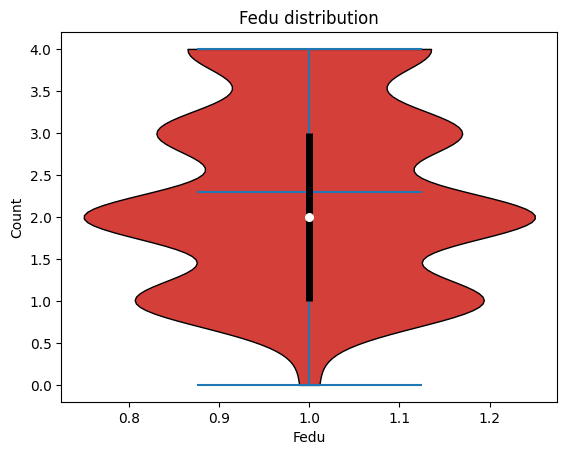

In [1001]:
# Fedu time distribution (numeric)
viplot = plt.violinplot(
    X_train["Fedu"], 
    showmeans=True, 
    showmedians=False,
    showextrema=True
)
viplot["bodies"][0].set_facecolor('#D43F3A')
viplot["bodies"][0].set_edgecolor('black')
viplot["bodies"][0].set_alpha(1)
quartile1, median, quartile3 = np.percentile(X_train["Fedu"], [25, 50, 75])
plt.scatter(1.0, median, marker='o', color='white', s=30, zorder=3)
plt.vlines(1.0, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.xlabel('Fedu')
plt.ylabel('Count')
plt.title('Fedu distribution')
plt.show()

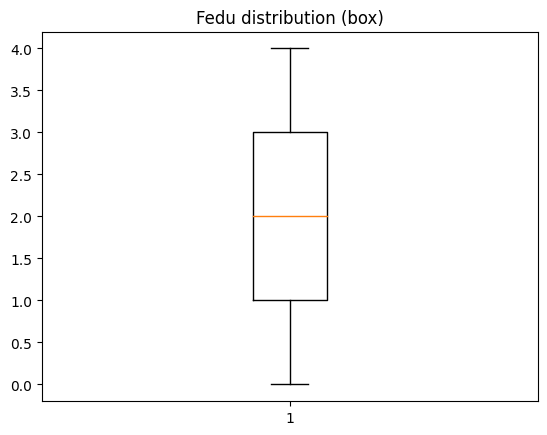

In [1002]:
# Fedu time distribution (as numeric)
plt.boxplot(X_train["Fedu"])
plt.title('Fedu distribution (box)')
plt.show()

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

In [1003]:
# data categories separation
binary_columns = []
category_classified_columns = []
numeric_columns = []
for column_name in list(X_train.columns):
    unique_values_count = len(X_train[column_name].unique())
    if unique_values_count == 2:
        binary_columns.append(column_name)
    elif unique_values_count <= 6 and unique_values_count > 2:
        category_classified_columns.append(column_name)
    else:
        numeric_columns.append(column_name)

categorial_columns = binary_columns + category_classified_columns

# category_classified_columns.remove('Dalc')
# category_classified_columns.remove('Walc')
# numeric_columns.append("Dalc")
# numeric_columns.append("Walc")

# numeric_columns.remove('Alcohol Consumption')
# category_classified_columns.append("Alcohol Consumption")

print("binary: ", binary_columns, "\n")
print("classified: ", category_classified_columns, "\n")
print("numeric: ", numeric_columns, "\n")
print("categorial: ", categorial_columns, "\n")

binary:  ['school', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'] 

classified:  ['sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'] 

numeric:  ['age', 'absences', 'G3', 'Alcohol Consumption'] 

categorial:  ['school', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'] 



In [1004]:
X_train_copy = X_train.copy()
for cat_name in categorial_columns:
    X_train_copy[cat_name] = X_train_copy[cat_name].astype('category')
    X_train_copy[cat_name] = X_train_copy[cat_name].cat.codes

X_train_copy.fillna(0)
X_train_copy.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Alcohol Consumption
school,1.000000,-0.078033,-0.036387,-0.342085,-0.001698,0.052829,-0.293620,-0.222724,-0.247365,-0.061214,...,0.063418,-0.057844,0.019769,0.023521,0.041446,0.012342,-0.063176,-0.166139,-0.320668,0.030695
sex,-0.078033,1.000000,0.012887,0.007411,0.152486,0.031682,0.133244,0.076866,0.186067,0.028348,...,-0.082941,0.042819,0.129399,0.092673,0.266382,0.309100,0.109909,0.069145,-0.086976,0.319167
age,-0.036387,0.012887,1.000000,0.032943,-0.009230,-0.046201,0.017118,0.015926,-0.025511,-0.008821,...,0.101616,0.050729,-0.048159,-0.019423,-0.033190,-0.038725,-0.105574,-0.026602,-0.031453,-0.040021
address,-0.342085,0.007411,0.032943,1.000000,0.053957,-0.129347,0.196450,0.097151,0.129785,-0.055613,...,0.014842,-0.036603,0.008144,0.071705,-0.016038,0.018653,0.027410,0.121935,0.145827,0.000550
famsize,-0.001698,0.152486,-0.009230,0.053957,1.000000,-0.239861,0.045143,0.002911,0.053709,-0.071697,...,-0.019122,-0.017232,-0.011725,0.030212,0.075936,0.114568,-0.003039,0.027136,0.052868,0.105016
Pstatus,0.052829,0.031682,-0.046201,-0.129347,-0.239861,1.000000,-0.073721,-0.018390,-0.021203,0.097314,...,-0.108254,0.069013,-0.023827,0.002044,0.047257,0.077074,-0.006597,-0.134438,-0.019453,0.068418
Medu,-0.293620,0.133244,0.017118,0.196450,0.045143,-0.073721,1.000000,0.650052,0.458752,0.102308,...,-0.042563,0.068827,0.029327,0.055263,-0.011133,-0.021110,0.045795,0.018881,0.207645,-0.017685
Fedu,-0.222724,0.076866,0.015926,0.097151,0.002911,-0.018390,0.650052,1.000000,0.275805,0.187403,...,-0.038604,0.086715,0.032968,0.062423,-0.002507,-0.001616,0.086325,0.047975,0.196666,-0.002318
Mjob,-0.247365,0.186067,-0.025511,0.129785,0.053709,-0.021203,0.458752,0.275805,1.000000,0.150852,...,-0.087590,0.053693,0.087293,0.026385,0.073816,0.033519,0.106474,0.053080,0.121380,0.060788
Fjob,-0.061214,0.028348,-0.008821,-0.055613,-0.071697,0.097314,0.102308,0.187403,0.150852,1.000000,...,-0.027064,0.024315,-0.028532,0.011475,0.090857,0.109811,0.009108,-0.027653,-0.041985,0.111186


## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

<AxesSubplot:>

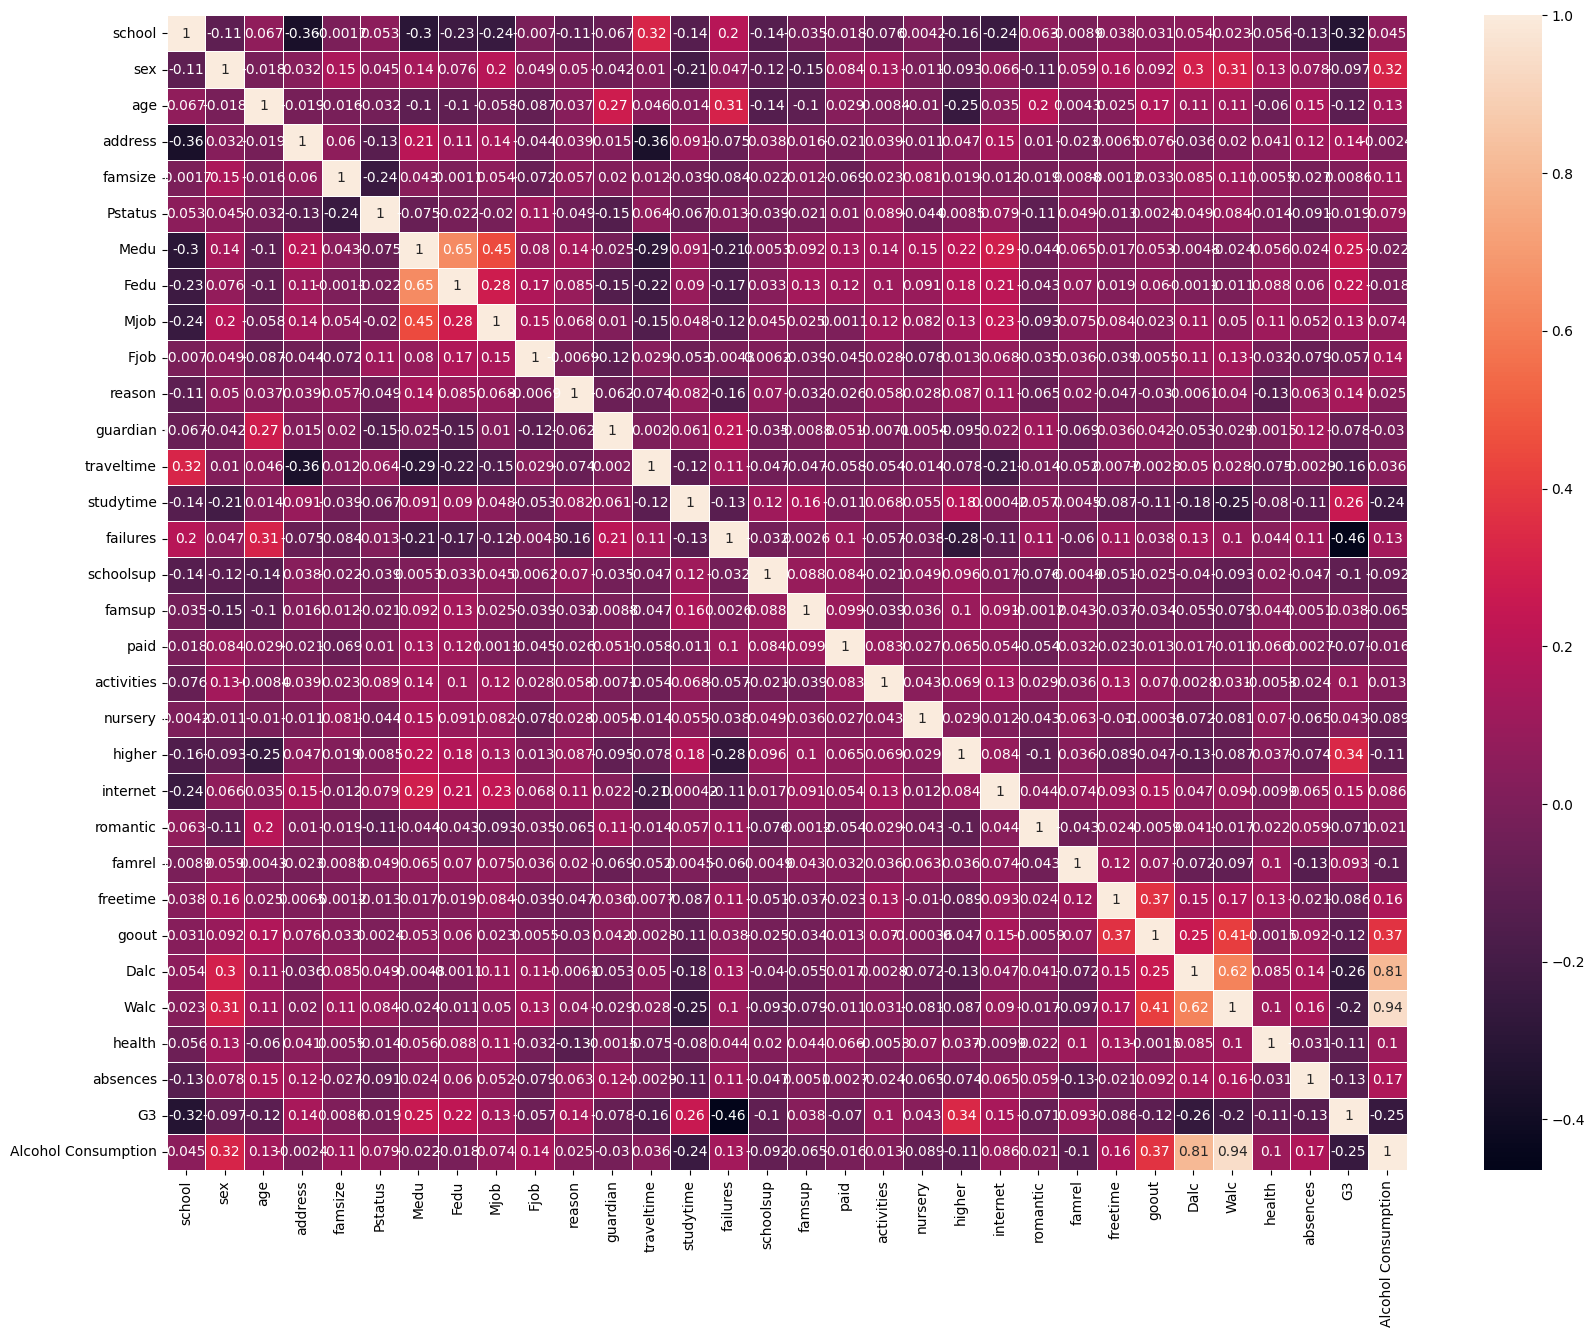

In [1005]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(X_train_copy.corr(method = 'spearman'), annot=True, linewidths=.5, ax=ax)

In [1006]:
# find highly correlated (>= 0.5)
correlated_threshold = 0.44

spearman_corr = X_train_copy.corr(method = 'spearman')
spearman_corr_correlated = spearman_corr[((spearman_corr >= correlated_threshold) & (spearman_corr < 1.0)) | ((spearman_corr <= -correlated_threshold) & (spearman_corr >= -1.0))]
correlated_pairs = []
for col_name in spearman_corr_correlated.columns:
    a = spearman_corr_correlated[spearman_corr_correlated[col_name].notnull()].index.tolist()
    if len(a) != 0:
        for cor_name in a:
            pair = set([col_name, cor_name])
            if pair not in correlated_pairs:
                correlated_pairs.append(pair)

correlated_pairs

[{'Fedu', 'Medu'},
 {'Medu', 'Mjob'},
 {'G3', 'failures'},
 {'Dalc', 'Walc'},
 {'Alcohol Consumption', 'Dalc'},
 {'Alcohol Consumption', 'Walc'}]

<AxesSubplot:>

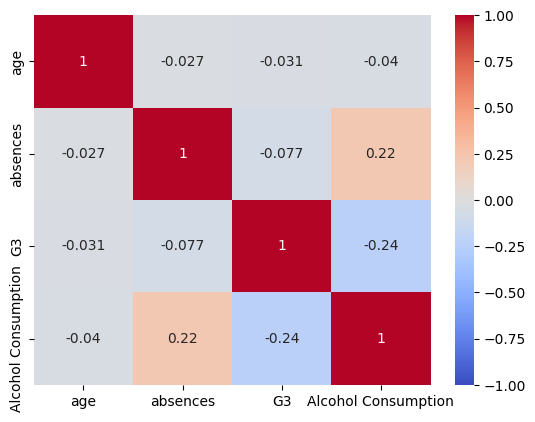

In [1007]:
# numeric corr Pierson
sns.heatmap(X_train_copy[numeric_columns].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<AxesSubplot:>

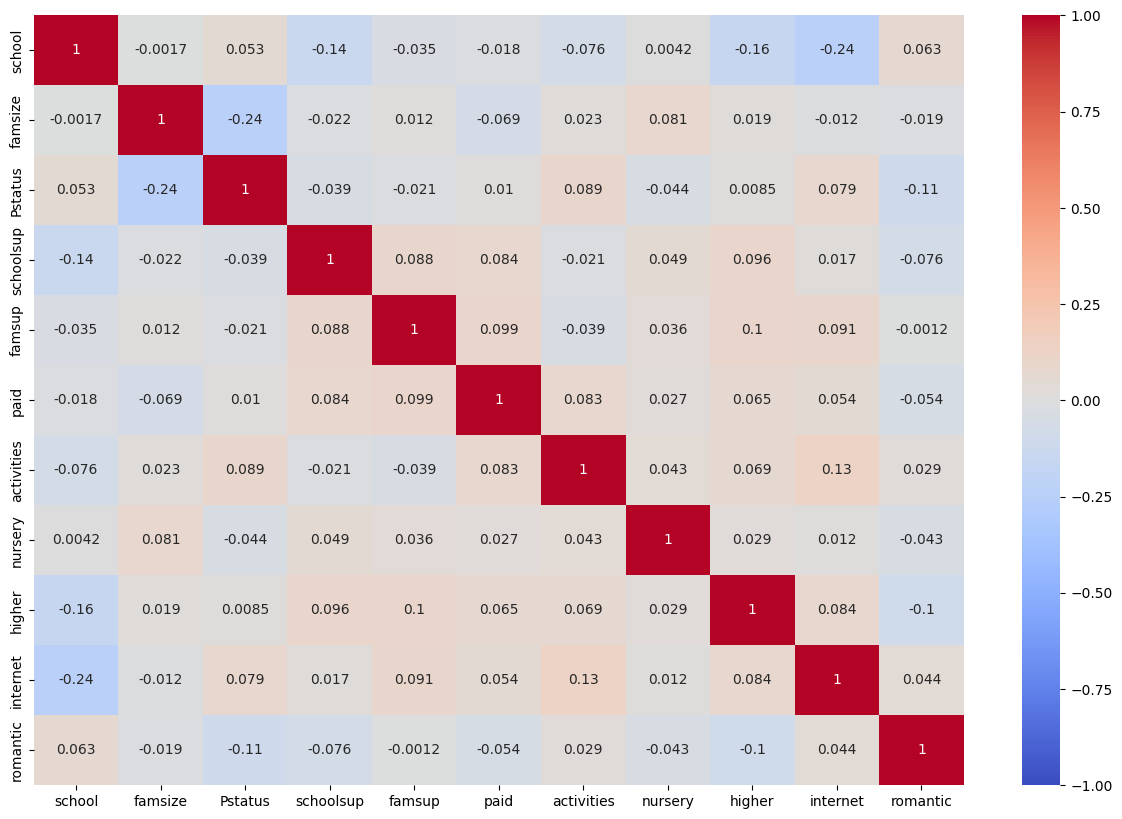

In [1008]:
# binary corr Pierson
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(X_train_copy[binary_columns].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<AxesSubplot:>

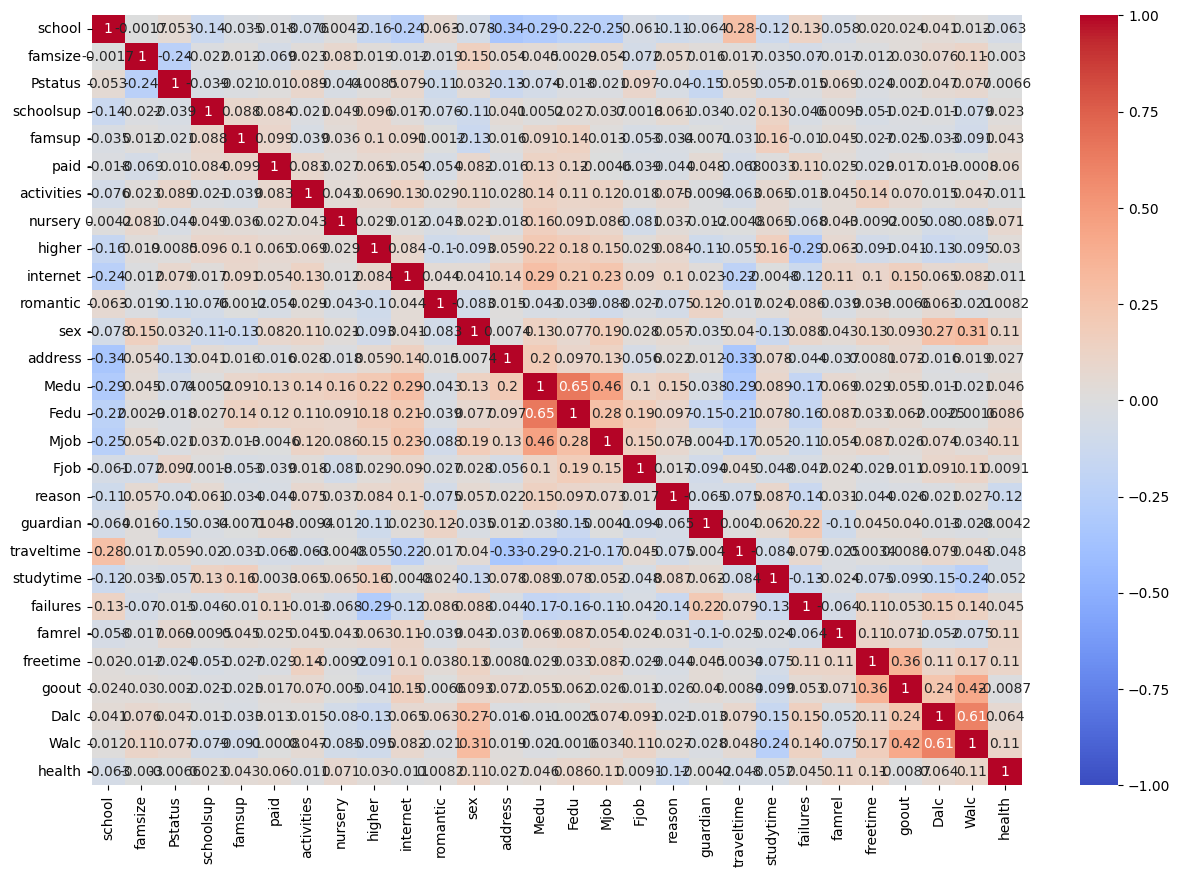

In [1009]:
# categorial corr Pearson
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(X_train_copy[categorial_columns].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

In [1010]:
# raw
for column_name in list(X_train.columns):
    print(f"Column '{column_name}':\n\tUnique values: {list(X_train[column_name].unique())}\tCount: {len(X_train[column_name].unique())}")

Column 'school':
	Unique values: ['MS', 'GP']	Count: 2
Column 'sex':
	Unique values: ['M', 'F', 'D', 'C', 'B', 'A']	Count: 6
Column 'age':
	Unique values: [nan, 15.0, 17.0, 20.0, 18.0, 16.0, 19.0, 161.0, 181.0, 151.0, 116.0, 21.0, 22.0, -1.0, 1.0, 5.0, 8.0]	Count: 17
Column 'address':
	Unique values: ['U', 'R', nan]	Count: 3
Column 'famsize':
	Unique values: ['LE3', 'GT3']	Count: 2
Column 'Pstatus':
	Unique values: ['T', 'A']	Count: 2
Column 'Medu':
	Unique values: [1, 3, 4, 2, 0]	Count: 5
Column 'Fedu':
	Unique values: [3, 4, 1, 2, 0]	Count: 5
Column 'Mjob':
	Unique values: ['at_home', 'teacher', 'other', 'services', 'health']	Count: 5
Column 'Fjob':
	Unique values: ['services', 'other', 'at_home', 'teacher', 'health']	Count: 5
Column 'reason':
	Unique values: ['course', 'home', 'reputation', 'other']	Count: 4
Column 'guardian':
	Unique values: ['mother', 'father', 'other']	Count: 3
Column 'traveltime':
	Unique values: [1, 3, 2, 4]	Count: 4
Column 'studytime':
	Unique values: [1, 2, 3

## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

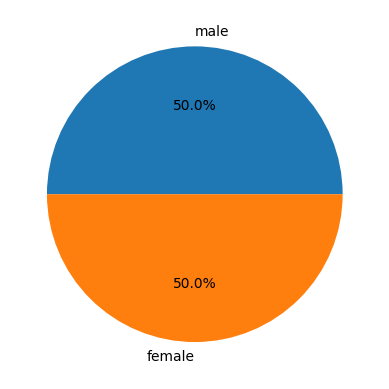

In [1011]:
# man_filter = X_train[(X_train[""])]
high_marks_with_traveltime = X_train[(X_train["traveltime"] >= 3) & (X_train["G3"] >= 10)]
plt.pie(
    [high_marks_with_traveltime["sex"].value_counts()["M"], high_marks_with_traveltime["sex"].value_counts()["F"]], 
    labels = ["male", "female"], autopct='%1.1f%%')
plt.show()

## Построить boxplot для оценок по возрасту.  

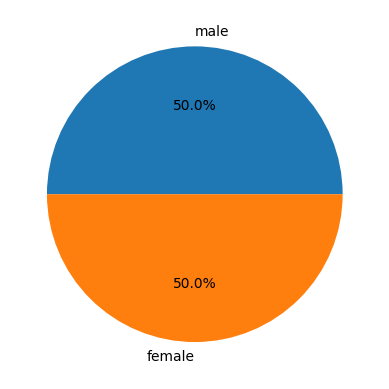

In [1012]:
# man_filter = X_train[(X_train[""])]
high_marks_with_traveltime = X_train[(X_train["traveltime"] >= 3) & (X_train["G3"] >= 10)]
plt.pie(
    [high_marks_with_traveltime["sex"].value_counts()["M"], high_marks_with_traveltime["sex"].value_counts()["F"]], 
    labels = ["male", "female"], autopct='%1.1f%%')
plt.show()

## Найти id топ-5 самых юных отличников.

In [1013]:
list(X_train.sort_values(by=['G3'], ascending=False).head(5).index)

[74, 377, 151, 109, 294]

## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [1014]:
# origin
print("Origin")
for age in sorted(list(X_train["age"].unique())):
    print("Age: ", age, ". Max Mark: ", X_train[X_train["age"] == age]["G3"].max(), ". Min Mark: ", X_train[X_train["age"] == age]["G3"].min())
# X_train[X_train["age"] == 17]["G3"].min()

# clear
print("\nClear")
for age in sorted([15 + i for i in range(8)]):
    print("Age: ", age, ". Max Mark: ", X_train[X_train["age"] == age]["G3"].max(), ". Min Mark: ", X_train[X_train["age"] == age]["G3"].min())

Origin
Age:  nan . Max Mark:  nan . Min Mark:  nan
Age:  -1.0 . Max Mark:  17 . Min Mark:  17
Age:  1.0 . Max Mark:  11 . Min Mark:  11
Age:  5.0 . Max Mark:  9 . Min Mark:  9
Age:  8.0 . Max Mark:  9 . Min Mark:  9
Age:  15.0 . Max Mark:  18 . Min Mark:  8
Age:  16.0 . Max Mark:  18 . Min Mark:  1
Age:  17.0 . Max Mark:  19 . Min Mark:  0
Age:  18.0 . Max Mark:  17 . Min Mark:  0
Age:  19.0 . Max Mark:  13 . Min Mark:  0
Age:  20.0 . Max Mark:  15 . Min Mark:  10
Age:  21.0 . Max Mark:  12 . Min Mark:  10
Age:  22.0 . Max Mark:  5 . Min Mark:  5
Age:  116.0 . Max Mark:  0 . Min Mark:  0
Age:  151.0 . Max Mark:  11 . Min Mark:  11
Age:  161.0 . Max Mark:  13 . Min Mark:  13
Age:  181.0 . Max Mark:  17 . Min Mark:  17

Clear
Age:  15 . Max Mark:  18 . Min Mark:  8
Age:  16 . Max Mark:  18 . Min Mark:  1
Age:  17 . Max Mark:  19 . Min Mark:  0
Age:  18 . Max Mark:  17 . Min Mark:  0
Age:  19 . Max Mark:  13 . Min Mark:  0
Age:  20 . Max Mark:  15 . Min Mark:  10
Age:  21 . Max Mark:  12 

# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

#### Данные с ошибками
sex, age
#### Данные с пропусками
age, adress
#### Скореллированные данные
1) 'Fedu' <-> 'Medu'
2) 'Mjob' <-> 'Medu'
3) 'Dalc' <-> 'Walc'
4) 'Alcohol Consumption' <-> 'Dalc'
5) 'Alcohol Consumption' <-> 'Walc'


## Найдите и исправьте ошибки в данных

Один из вариантов реализации для пола. Ниже данные будут заменены адаптивным заполнением

In [1015]:
# processed
for column_name in list(X_train.columns):
    print(f"Column '{column_name}':\n\tUnique values: {list(X_train[column_name].unique())}\tCount: {len(X_train[column_name].unique())}")

Column 'school':
	Unique values: ['MS', 'GP']	Count: 2
Column 'sex':
	Unique values: ['M', 'F', 'D', 'C', 'B', 'A']	Count: 6
Column 'age':
	Unique values: [nan, 15.0, 17.0, 20.0, 18.0, 16.0, 19.0, 161.0, 181.0, 151.0, 116.0, 21.0, 22.0, -1.0, 1.0, 5.0, 8.0]	Count: 17
Column 'address':
	Unique values: ['U', 'R', nan]	Count: 3
Column 'famsize':
	Unique values: ['LE3', 'GT3']	Count: 2
Column 'Pstatus':
	Unique values: ['T', 'A']	Count: 2
Column 'Medu':
	Unique values: [1, 3, 4, 2, 0]	Count: 5
Column 'Fedu':
	Unique values: [3, 4, 1, 2, 0]	Count: 5
Column 'Mjob':
	Unique values: ['at_home', 'teacher', 'other', 'services', 'health']	Count: 5
Column 'Fjob':
	Unique values: ['services', 'other', 'at_home', 'teacher', 'health']	Count: 5
Column 'reason':
	Unique values: ['course', 'home', 'reputation', 'other']	Count: 4
Column 'guardian':
	Unique values: ['mother', 'father', 'other']	Count: 3
Column 'traveltime':
	Unique values: [1, 3, 2, 4]	Count: 4
Column 'studytime':
	Unique values: [1, 2, 3

In [1016]:
# sex
X_train_copy = X_train.copy()
if len(X_train_copy["sex"].unique()) > 2:
    odd_values = list(X_train_copy["sex"].unique())
    odd_values.remove("M")
    odd_values.remove("F")
    for odd_sex in odd_values:
        random_sex = random.choice(["M", "F"])
        X_train_copy["sex"] = X_train_copy["sex"].replace(odd_sex, random_sex)

In [1017]:
# age
X_train.loc[(X_train['age'] > 22) | (X_train['age'] < 15), 'age'] = int(np.random.normal(X_train_age_copy.mean(), X_train_age_copy.std()))

In [1018]:
# processed
for column_name in list(X_train.columns):
    print(f"Column '{column_name}':\n\tUnique values: {list(X_train[column_name].unique())}\tCount: {len(X_train[column_name].unique())}")

Column 'school':
	Unique values: ['MS', 'GP']	Count: 2
Column 'sex':
	Unique values: ['M', 'F', 'D', 'C', 'B', 'A']	Count: 6
Column 'age':
	Unique values: [nan, 15.0, 17.0, 20.0, 18.0, 16.0, 19.0, 21.0, 22.0]	Count: 9
Column 'address':
	Unique values: ['U', 'R', nan]	Count: 3
Column 'famsize':
	Unique values: ['LE3', 'GT3']	Count: 2
Column 'Pstatus':
	Unique values: ['T', 'A']	Count: 2
Column 'Medu':
	Unique values: [1, 3, 4, 2, 0]	Count: 5
Column 'Fedu':
	Unique values: [3, 4, 1, 2, 0]	Count: 5
Column 'Mjob':
	Unique values: ['at_home', 'teacher', 'other', 'services', 'health']	Count: 5
Column 'Fjob':
	Unique values: ['services', 'other', 'at_home', 'teacher', 'health']	Count: 5
Column 'reason':
	Unique values: ['course', 'home', 'reputation', 'other']	Count: 4
Column 'guardian':
	Unique values: ['mother', 'father', 'other']	Count: 3
Column 'traveltime':
	Unique values: [1, 3, 2, 4]	Count: 4
Column 'studytime':
	Unique values: [1, 2, 3, 4]	Count: 4
Column 'failures':
	Unique values: [

## Удалите скоррелированные данные

In [1019]:
Dalc = X_train["Dalc"].copy()
Walc = X_train["Walc"].copy()
X_train = X_train.drop(columns=['Medu', "Dalc", "Walc"])

In [1020]:
for corr_col in ['Medu', "Dalc", "Walc"]:
    categorial_columns.remove(corr_col)
    category_classified_columns.remove(corr_col)
categorial_columns

['school',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'sex',
 'address',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health']

In [1021]:
# processed
for column_name in list(X_train.columns):
    print(f"Column '{column_name}':\n\tUnique values: {list(X_train[column_name].unique())}\tCount: {len(X_train[column_name].unique())}")

Column 'school':
	Unique values: ['MS', 'GP']	Count: 2
Column 'sex':
	Unique values: ['M', 'F', 'D', 'C', 'B', 'A']	Count: 6
Column 'age':
	Unique values: [nan, 15.0, 17.0, 20.0, 18.0, 16.0, 19.0, 21.0, 22.0]	Count: 9
Column 'address':
	Unique values: ['U', 'R', nan]	Count: 3
Column 'famsize':
	Unique values: ['LE3', 'GT3']	Count: 2
Column 'Pstatus':
	Unique values: ['T', 'A']	Count: 2
Column 'Fedu':
	Unique values: [3, 4, 1, 2, 0]	Count: 5
Column 'Mjob':
	Unique values: ['at_home', 'teacher', 'other', 'services', 'health']	Count: 5
Column 'Fjob':
	Unique values: ['services', 'other', 'at_home', 'teacher', 'health']	Count: 5
Column 'reason':
	Unique values: ['course', 'home', 'reputation', 'other']	Count: 4
Column 'guardian':
	Unique values: ['mother', 'father', 'other']	Count: 3
Column 'traveltime':
	Unique values: [1, 3, 2, 4]	Count: 4
Column 'studytime':
	Unique values: [1, 2, 3, 4]	Count: 4
Column 'failures':
	Unique values: [0, 1, 2, 3]	Count: 4
Column 'schoolsup':
	Unique values:

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

Один из вариантов (адаптивный ниже)

In [1022]:
X_train_with_nan = X_train.copy()

# age
X_train_with_nan["age"] = X_train_with_nan["age"].fillna(int(X_train_with_nan["age"].mean()))

# adress
X_train_with_nan['address'] = X_train_with_nan['address'].fillna(random.choice(['U', 'R']))

## Закодируйте категориальные признаки

применен ниже, после обработки. Тут пример реализации

In [1023]:
one_hot_encoded_data = pd.get_dummies(X_train, columns=categorial_columns)
one_hot_encoded_data

,age,absences,G3,Alcohol Consumption,school_GP,school_MS,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,goout_1,goout_2,goout_3,goout_4,goout_5,health_1,health_2,health_3,health_4,health_5
0,NaN,0,9,2.4,False,True,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
1,NaN,16,12,3.8,True,False,False,True,False,True,...,False,False,False,True,False,False,False,True,False,False
2,15.0,0,13,1.0,True,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,True
3,17.0,4,11,1.8,False,True,True,False,False,True,...,False,False,False,False,True,False,True,False,False,False
4,20.0,8,12,1.4,True,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,15.0,0,10,1.0,True,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False
450,15.0,4,10,1.0,True,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
451,16.0,4,15,1.4,True,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
452,15.0,0,10,1.4,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False


## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

Дано потребление алкоголя по выходным и по рабочим дням. Они скоррелированы. Можно ввести совместную величину еженедельного потребления и удалить старые

In [1024]:
workday_weight = 0.6
weekend_weight = 0.4
# см выше данный признак
# X_train["Alcohol Consumption"] = workday_weight * Dalc + weekend_weight * Walc

Можно посмотреть на характеристику недельной нагрузки (учебное время + время на дорогу)

In [1025]:
one_hot_encoded_paid_activities = pd.get_dummies(X_train, columns=["paid", "activities"])[["paid_yes", "activities_yes"]]
one_hot_encoded_paid_activities

,paid_yes,activities_yes
0,False,False
1,False,True
2,False,True
3,True,True
4,True,True
...,...,...
449,False,False
450,False,False
451,True,True
452,False,False


In [1026]:
one_hot_encoded_paid_activities = pd.get_dummies(X_train, columns=["paid", "activities"])[["paid_yes", "activities_yes"]]
X_train["weekly_load"] = np.sqrt(np.abs(np.square(X_train['traveltime'] - np.mean(X_train['traveltime'])) + np.square(X_train["studytime"] - np.mean(X_train["studytime"]))))
# X_train_copy["weekly_load"] = (X_train_copy['traveltime'] + X_train_copy["studytime"] + 0.8 * (one_hot_encoded_paid_activities["paid_yes"] + one_hot_encoded_paid_activities["activities_yes"])) / 12
numeric_columns.append("weekly_load")

# X_train_with_nan["weekly_load"] = X_train_copy["weekly_load"]

In [1027]:
print(f"Column 'Weekly_load':\n\tUnique values: {list(X_train['weekly_load'].unique())}\tCount: {len(X_train['weekly_load'].unique())}")

Column 'Weekly_load':
	Unique values: [1.0727573270384072, 1.659618182531596, 0.609157286663473, 0.4157339466926529, 0.9759971297355505, 2.4034056968201476, 1.261482032006727, 1.1802961626698896, 2.5604871853471405, 2.1935362395584983, 1.7874174515626482, 1.4052034831191156, 2.147874146404738, 2.5328097961219527, 2.6451130903400246, 3.1963866439886104]	Count: 16


<AxesSubplot:>

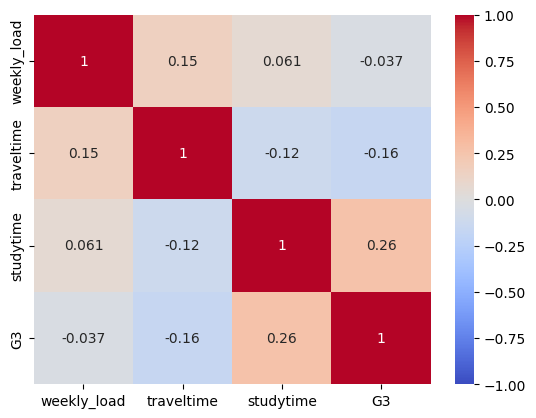

In [1028]:
sns.heatmap(X_train[['weekly_load', 'traveltime', "studytime", 'G3']].corr(method = 'spearman'), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<AxesSubplot:>

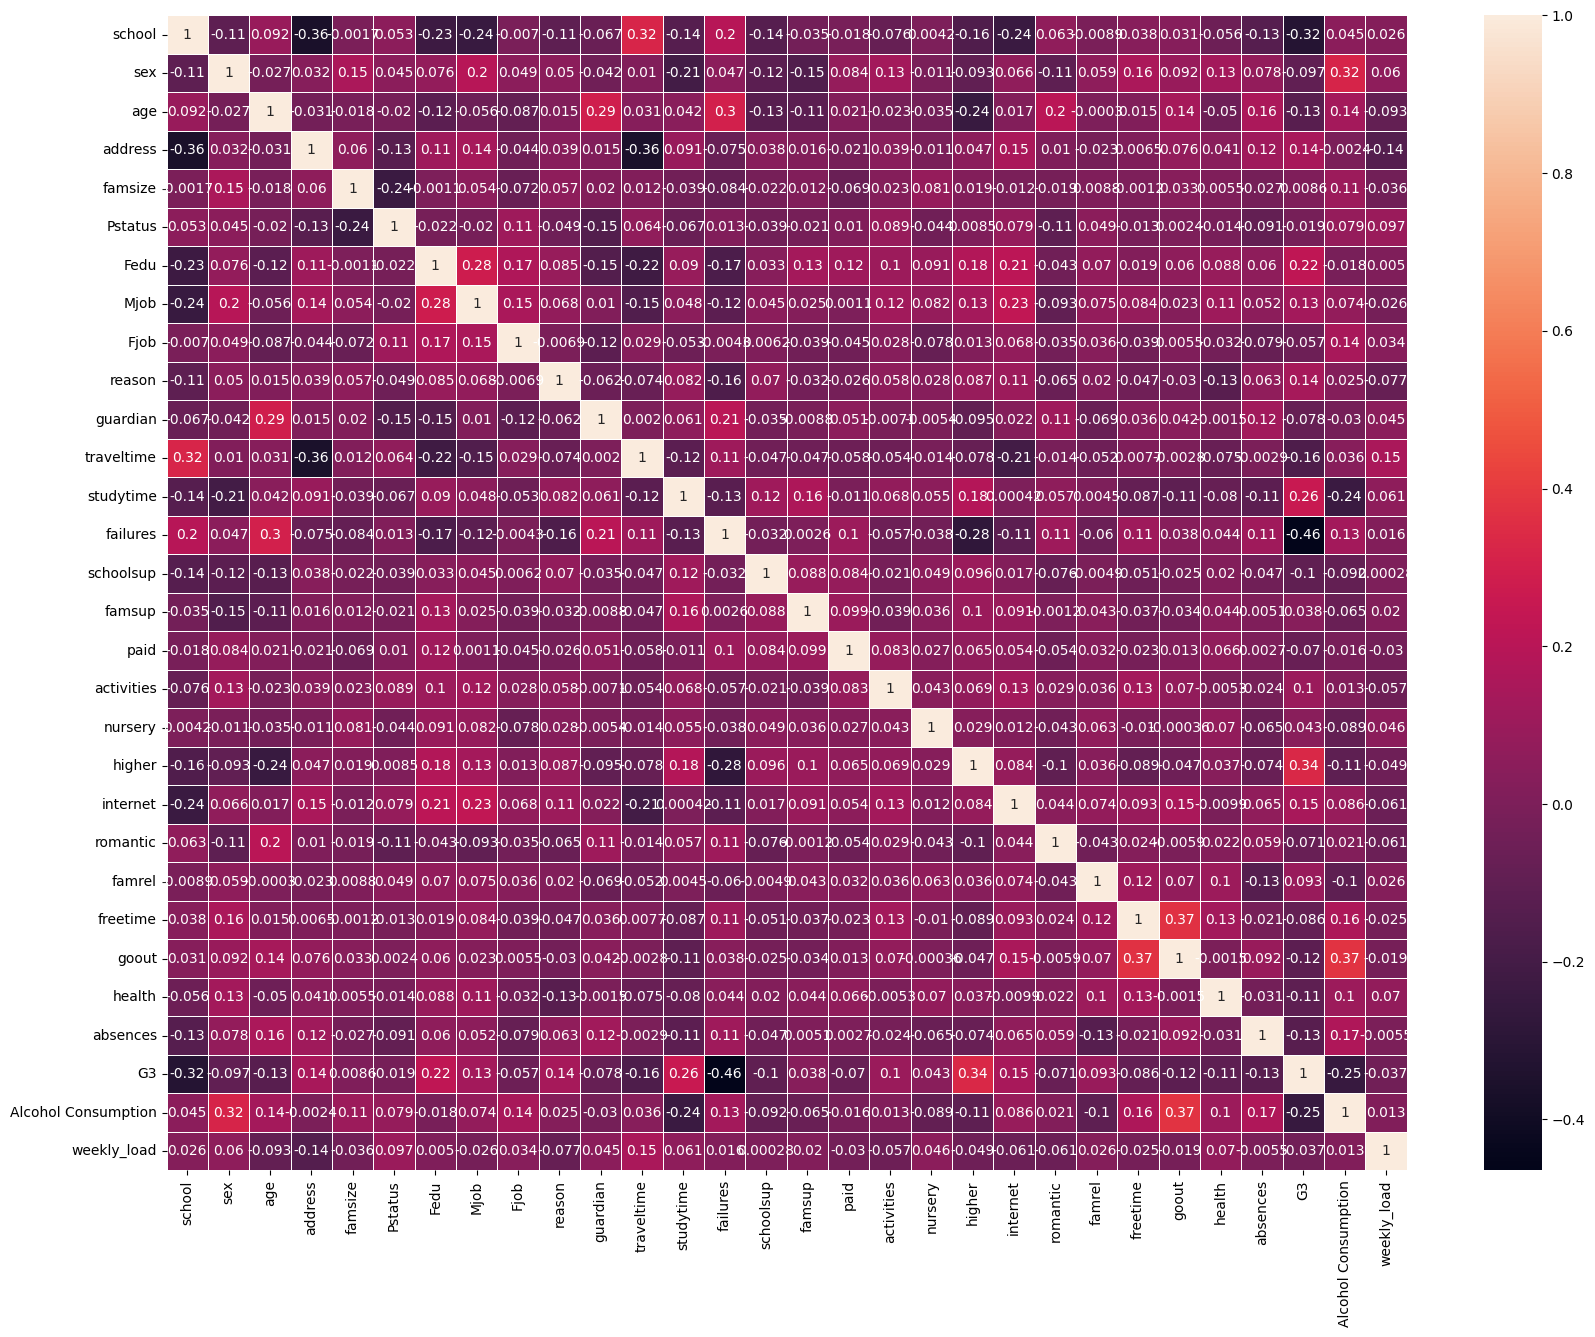

In [1029]:
X_train_copy = X_train.copy()
for cat_name in categorial_columns:
    X_train_copy[cat_name] = X_train_copy[cat_name].astype('category')
    X_train_copy[cat_name] = X_train_copy[cat_name].cat.codes

X_train_copy.fillna(0)

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(X_train_copy.corr(method = 'spearman'), annot=True, linewidths=.5, ax=ax)

In [1030]:
# processed
for column_name in list(X_train.columns):
    print(f"Column '{column_name}':\n\tUnique values: {list(X_train[column_name].unique())}\tCount: {len(X_train[column_name].unique())}")

Column 'school':
	Unique values: ['MS', 'GP']	Count: 2
Column 'sex':
	Unique values: ['M', 'F', 'D', 'C', 'B', 'A']	Count: 6
Column 'age':
	Unique values: [nan, 15.0, 17.0, 20.0, 18.0, 16.0, 19.0, 21.0, 22.0]	Count: 9
Column 'address':
	Unique values: ['U', 'R', nan]	Count: 3
Column 'famsize':
	Unique values: ['LE3', 'GT3']	Count: 2
Column 'Pstatus':
	Unique values: ['T', 'A']	Count: 2
Column 'Fedu':
	Unique values: [3, 4, 1, 2, 0]	Count: 5
Column 'Mjob':
	Unique values: ['at_home', 'teacher', 'other', 'services', 'health']	Count: 5
Column 'Fjob':
	Unique values: ['services', 'other', 'at_home', 'teacher', 'health']	Count: 5
Column 'reason':
	Unique values: ['course', 'home', 'reputation', 'other']	Count: 4
Column 'guardian':
	Unique values: ['mother', 'father', 'other']	Count: 3
Column 'traveltime':
	Unique values: [1, 3, 2, 4]	Count: 4
Column 'studytime':
	Unique values: [1, 2, 3, 4]	Count: 4
Column 'failures':
	Unique values: [0, 1, 2, 3]	Count: 4
Column 'schoolsup':
	Unique values:

In [1031]:
# X_train.to_csv('train_features_with_answers_visual_processed.csv', sep=',', index=False, encoding='utf-8')
# X_train.to_csv('train_features_with_answers_processed_except_nan.csv', sep=',', index=False, encoding='utf-8')

In [1032]:
# one_hot_encoded_data["weekly_load"] = X_train["weekly_load"]
# one_hot_encoded_data.to_csv('train_features_with_answers_visual_processed_encoded.csv', sep=',', index=False, encoding='utf-8')

# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [1033]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, GroupKFold, GroupShuffleSplit

In [1034]:
X_train.head(5)

,school,sex,age,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,health,absences,G3,Alcohol Consumption,weekly_load
0,MS,M,NaN,U,LE3,T,3,at_home,services,course,...,yes,yes,4,3,3,3,0,9,2.4,1.072757
1,GP,M,NaN,R,LE3,T,3,teacher,other,home,...,yes,no,3,3,4,3,16,12,3.8,1.659618
2,GP,M,15.0,NaN,GT3,T,4,other,other,home,...,yes,no,5,5,1,5,0,13,1.0,0.609157
3,MS,M,17.0,R,GT3,T,3,services,other,home,...,yes,yes,4,5,5,2,4,11,1.8,0.415734
4,GP,F,20.0,R,GT3,T,1,other,other,course,...,yes,yes,1,2,3,2,8,12,1.4,0.415734


#### Примеры разбиений (раскомментить нужную строку для стратегии)

In [1035]:
# CV strategy

# cv_folds = KFold(n_splits=5)
# cv_folds = ShuffleSplit(n_splits=5)
# cv_folds = StratifiedKFold(n_splits=5)
# cv_folds = StratifiedShuffleSplit(n_splits=5)
# cv_folds = GroupKFold(n_splits=2)
cv_folds = GroupShuffleSplit(n_splits=2)

In [1036]:
# CV example
fold_collection = {}
# base
if 'Stratified' not in type(cv_folds).__name__ and 'Group' not in type(cv_folds).__name__:
    for i, (train_index, test_index) in enumerate(cv_folds.split(X_train)):
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")
        fold_collection[i] = {
            "Train": [X_train.loc[:, X_train.columns != 'G3'].iloc[train_index], X_train.loc[:, X_train.columns == 'G3'].iloc[train_index]],
            "Test": [X_train.loc[:, X_train.columns != 'G3'].iloc[test_index], X_train.loc[:, X_train.columns == 'G3'].iloc[test_index]],
        }


# stratified
if 'Stratified' in type(cv_folds).__name__:
    design, target = X_train.loc[:, X_train.columns != 'G3'], X_train['G3']
    for i, (train_index, test_index) in enumerate(cv_folds.split(design, target)):
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")
        fold_collection[i] = {
            "Train": [X_train.loc[:, X_train.columns != 'G3'].iloc[train_index], X_train.loc[:, X_train.columns == 'G3'].iloc[train_index]],
            "Test": [X_train.loc[:, X_train.columns != 'G3'].iloc[test_index], X_train.loc[:, X_train.columns == 'G3'].iloc[test_index]],
        }

        print('train -  {}   |   test -  {}'.format(np.bincount(target[train_index]), np.bincount(target[test_index])))
        
# group
if 'Group' in type(cv_folds).__name__:
    design, target = X_train.loc[:, X_train.columns != 'G3'], X_train['G3']
    group = design["higher"]
    for i, (train_index, test_index) in enumerate(cv_folds.split(design, target, groups = group)):
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")

        print("test groups")
        print(f"Train groups X: {list(X_train.loc[:, X_train.columns != 'G3'].iloc[train_index]['higher'].unique())}")
        print(f"Test groups X: {list(X_train.loc[:, X_train.columns != 'G3'].iloc[test_index]['higher'].unique())}")
        fold_collection[i] = {
            "Train": [X_train.loc[:, X_train.columns != 'G3'].iloc[train_index], X_train.loc[:, X_train.columns == 'G3'].iloc[train_index]],
            "Test": [X_train.loc[:, X_train.columns != 'G3'].iloc[test_index], X_train.loc[:, X_train.columns == 'G3'].iloc[test_index]],
        }

fold_collection

Fold 0:
  Train: index=[  0   4  16  21  22  34  47  56  58  61  72  79  84 103 118 123 126 128
 131 136 139 152 156 176 179 191 209 213 220 227 230 245 246 258 260 261
 266 279 288 292 314 334 356 385 393 409 412 414 418 434]
  Test:  index=[  1   2   3   5   6   7   8   9  10  11  12  13  14  15  17  18  19  20
  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  52  53  54  55  57  59  60  62  63
  64  65  66  67  68  69  70  71  73  74  75  76  77  78  80  81  82  83
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 119 120 121 122
 124 125 127 129 130 132 133 134 135 137 138 140 141 142 143 144 145 146
 147 148 149 150 151 153 154 155 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 177 178 180 181 182 183 184 185 186
 187 188 189 190 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 210 211 212 214

{0: {'Train': [    school sex   age address famsize Pstatus  Fedu      Mjob      Fjob  \
   0       MS   M   NaN       U     LE3       T     3   at_home  services   
   4       GP   F  20.0       R     GT3       T     1     other     other   
   16      MS   F  18.0       R     GT3       T     1   at_home   at_home   
   21      GP   M  17.0     NaN     LE3       T     1     other  services   
   22      GP   F  16.0     NaN     GT3       T     2     other     other   
   34      GP   M  18.0       U     LE3       T     2  services  services   
   47      GP   F  19.0       R     GT3       T     2  services  services   
   56      GP   M  18.0       U     GT3       T     1  services  services   
   58      GP   M  17.0       U     GT3       T     2     other     other   
   61      GP   F  19.0       U     GT3       T     1     other     other   
   72      MS   F  19.0       U     LE3       A     1   at_home     other   
   79      MS   F  16.0       R     GT3       T     2     other 

## Разделите данные и объясните выбор стратегии

In [1037]:
default_cv = ShuffleSplit(n_splits=5)
group_cv = GroupShuffleSplit(n_splits=2)

design, target = X_train.loc[:, X_train.columns != 'G3'], X_train['G3']
group = design["higher"]

cv_indexes = {"shuffle": {}, "group": {}}
for i, (train_index, test_index) in enumerate(default_cv.split(X_train)):
    cv_indexes["shuffle"][i] = {
        "Train": [X_train.loc[:, X_train.columns != 'G3'].iloc[train_index], X_train.loc[:, X_train.columns == 'G3'].iloc[train_index]],
        "Test": [X_train.loc[:, X_train.columns != 'G3'].iloc[test_index], X_train.loc[:, X_train.columns == 'G3'].iloc[test_index]],
    }

for i, (train_index, test_index) in enumerate(cv_folds.split(design, target, groups = group)):
    cv_indexes["group"][i] = {
        "Train": [X_train.loc[:, X_train.columns != 'G3'].iloc[train_index], X_train.loc[:, X_train.columns == 'G3'].iloc[train_index]],
        "Test": [X_train.loc[:, X_train.columns != 'G3'].iloc[test_index], X_train.loc[:, X_train.columns == 'G3'].iloc[test_index]],
    }

cv_indexes

{'shuffle': {0: {'Train': [    school sex   age address famsize Pstatus  Fedu      Mjob      Fjob  \
    414     MS   F  16.0       U     LE3       A     2     other     other   
    332     MS   M  16.0       U     LE3       A     2     other  services   
    154     GP   F  17.0       U     LE3       T     2     other     other   
    426     GP   F  16.0       U     GT3       A     1     other     other   
    228     MS   F  17.0       R     GT3       T     1     other  services   
    ..     ...  ..   ...     ...     ...     ...   ...       ...       ...   
    177     GP   M  16.0       U     LE3       T     2  services  services   
    101     GP   F  18.0       U     GT3       T     1  services     other   
    359     GP   M  18.0       R     GT3       T     3     other  services   
    169     GP   M  15.0       R     GT3       T     3   at_home  services   
    387     GP   M  18.0       U     GT3       T     3   teacher     other   
    
             reason  ... higher  int

__Ваш ответ:__ лучше бить по дефолту через _StratifiedShuffleSplit_ для классификации, тк мы не знаем, обьединены ли данные одной природой, чтобы использовать GroupFold, и лучше перемешать данные для генерации независимой выборки, а так сохранится доля классов в test train и будет сохраняться распределение классов. 

Данную задачу можно рассматривать и как регрессию, и как классификацию. Для регрессии сложно взять Stratified тк нету деления по классам, поэтому лучше выбрать _ShuffleSplit_

Если в данных есть какая-то группировка по природе объектов - лучше использовать Group strategy. Возможно объекты сгруппированы по Fedu, higher и studytime (высокая корреляция с G3). Поэтому можно сделать группы с высшим образованием (_higher_ - бинарный признак, лекго делить)

__Вывод:__ Стоит попробовать Group Shuffle на higher и либо StratifiedShuffleSplit (если рассматривать как классификацию), либо ShuffleSplit (если как регрессию)

# Часть 4. Заполнение пропусков в данных

## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

In [1038]:
for column_name in list(X_train.columns):
    print(f"Column '{column_name}':\n\tUnique values: {list(X_train[column_name].unique())}\tCount: {len(X_train[column_name].unique())}")

Column 'school':
	Unique values: ['MS', 'GP']	Count: 2
Column 'sex':
	Unique values: ['M', 'F', 'D', 'C', 'B', 'A']	Count: 6
Column 'age':
	Unique values: [nan, 15.0, 17.0, 20.0, 18.0, 16.0, 19.0, 21.0, 22.0]	Count: 9
Column 'address':
	Unique values: ['U', 'R', nan]	Count: 3
Column 'famsize':
	Unique values: ['LE3', 'GT3']	Count: 2
Column 'Pstatus':
	Unique values: ['T', 'A']	Count: 2
Column 'Fedu':
	Unique values: [3, 4, 1, 2, 0]	Count: 5
Column 'Mjob':
	Unique values: ['at_home', 'teacher', 'other', 'services', 'health']	Count: 5
Column 'Fjob':
	Unique values: ['services', 'other', 'at_home', 'teacher', 'health']	Count: 5
Column 'reason':
	Unique values: ['course', 'home', 'reputation', 'other']	Count: 4
Column 'guardian':
	Unique values: ['mother', 'father', 'other']	Count: 3
Column 'traveltime':
	Unique values: [1, 3, 2, 4]	Count: 4
Column 'studytime':
	Unique values: [1, 2, 3, 4]	Count: 4
Column 'failures':
	Unique values: [0, 1, 2, 3]	Count: 4
Column 'schoolsup':
	Unique values:

__Misvalues columns__: adress, age

In [1039]:
# sex
if len(X_train["sex"].unique()) > 2:
    odd_values = list(X_train["sex"].unique())
    odd_values.remove("M")
    odd_values.remove("F")
    for odd_sex in odd_values:
        X_train["sex"] = X_train["sex"].replace(odd_sex, np.nan)

# age
X_train.loc[(X_train['age'] > 22) | (X_train['age'] < 15), 'age'] = np.nan

In [1040]:
# processed
for column_name in list(X_train.columns):
    print(f"Column '{column_name}':\n\tUnique values: {list(X_train[column_name].unique())}\tCount: {len(X_train[column_name].unique())}")

Column 'school':
	Unique values: ['MS', 'GP']	Count: 2
Column 'sex':
	Unique values: ['M', 'F', nan]	Count: 3
Column 'age':
	Unique values: [nan, 15.0, 17.0, 20.0, 18.0, 16.0, 19.0, 21.0, 22.0]	Count: 9
Column 'address':
	Unique values: ['U', 'R', nan]	Count: 3
Column 'famsize':
	Unique values: ['LE3', 'GT3']	Count: 2
Column 'Pstatus':
	Unique values: ['T', 'A']	Count: 2
Column 'Fedu':
	Unique values: [3, 4, 1, 2, 0]	Count: 5
Column 'Mjob':
	Unique values: ['at_home', 'teacher', 'other', 'services', 'health']	Count: 5
Column 'Fjob':
	Unique values: ['services', 'other', 'at_home', 'teacher', 'health']	Count: 5
Column 'reason':
	Unique values: ['course', 'home', 'reputation', 'other']	Count: 4
Column 'guardian':
	Unique values: ['mother', 'father', 'other']	Count: 3
Column 'traveltime':
	Unique values: [1, 3, 2, 4]	Count: 4
Column 'studytime':
	Unique values: [1, 2, 3, 4]	Count: 4
Column 'failures':
	Unique values: [0, 1, 2, 3]	Count: 4
Column 'schoolsup':
	Unique values: ['no', 'yes']	

## Адаптивное заполнения пропусков

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

In [1041]:
X_train

,school,sex,age,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,health,absences,G3,Alcohol Consumption,weekly_load
0,MS,M,NaN,U,LE3,T,3,at_home,services,course,...,yes,yes,4,3,3,3,0,9,2.4,1.072757
1,GP,M,NaN,R,LE3,T,3,teacher,other,home,...,yes,no,3,3,4,3,16,12,3.8,1.659618
2,GP,M,15.0,NaN,GT3,T,4,other,other,home,...,yes,no,5,5,1,5,0,13,1.0,0.609157
3,MS,M,17.0,R,GT3,T,3,services,other,home,...,yes,yes,4,5,5,2,4,11,1.8,0.415734
4,GP,F,20.0,R,GT3,T,1,other,other,course,...,yes,yes,1,2,3,2,8,12,1.4,0.415734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,GP,M,15.0,U,GT3,T,2,other,other,course,...,yes,no,3,3,3,3,0,10,1.0,2.193536
450,GP,F,15.0,U,GT3,T,2,other,other,course,...,yes,no,5,1,2,3,4,10,1.0,2.193536
451,GP,M,16.0,U,GT3,T,4,services,services,course,...,yes,no,5,3,2,5,4,15,1.4,1.072757
452,MS,F,15.0,R,LE3,T,1,at_home,services,reputation,...,yes,no,5,4,3,4,0,10,1.4,0.415734


In [1042]:
design = X_train.loc[:, X_train.columns != "G3"]
design = pd.get_dummies(design, columns=[elem for elem in list(design.columns) if (elem != 'address' and elem != 'sex' and elem not in numeric_columns)])

In [1043]:
design

,sex,age,address,absences,Alcohol Consumption,weekly_load,school_GP,school_MS,famsize_GT3,famsize_LE3,...,goout_1,goout_2,goout_3,goout_4,goout_5,health_1,health_2,health_3,health_4,health_5
0,M,NaN,U,0,2.4,1.072757,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
1,M,NaN,R,16,3.8,1.659618,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2,M,15.0,NaN,0,1.0,0.609157,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True
3,M,17.0,R,4,1.8,0.415734,False,True,True,False,...,False,False,False,False,True,False,True,False,False,False
4,F,20.0,R,8,1.4,0.415734,True,False,True,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,M,15.0,U,0,1.0,2.193536,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
450,F,15.0,U,4,1.0,2.193536,True,False,True,False,...,False,True,False,False,False,False,False,True,False,False
451,M,16.0,U,4,1.4,1.072757,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
452,F,15.0,R,0,1.4,0.415734,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False


Simple way with **KNN Imputer**

In [1044]:
from sklearn.impute import KNNImputer

design_copy = design.copy()

design_copy.loc[(design_copy['address'] == 'U'), 'address'] = True
design_copy.loc[(design_copy['address'] == 'R'), 'address'] = False
design_copy.loc[(design_copy['sex'] == 'M'), 'sex'] = True
design_copy.loc[(design_copy['sex'] == 'F'), 'sex'] = False

age_i = design_copy.columns.get_loc('age')
address_i = design_copy.columns.get_loc('address')
sex_i = design_copy.columns.get_loc('sex')

imputer = KNNImputer(n_neighbors=2)
design_fillna = imputer.fit_transform(design_copy)

design_fillna

array([[ 1. , 18.5,  1. , ...,  1. ,  0. ,  0. ],
       [ 1. , 17. ,  0. , ...,  1. ,  0. ,  0. ],
       [ 1. , 15. ,  1. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 1. , 16. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 0. , 15. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 1. , 15. ,  1. , ...,  0. ,  0. ,  1. ]])

In [1045]:
np.unique(design_fillna[:, 0])

array([0. , 0.5, 1. ])

Не совсем подходит, т.к. генерит дробные числа для категориальных признаков. Попробуем KNN для sex, address. Age просто заменим значением гауссовского распределения

In [1046]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [1047]:
# age
X_train["age"] = X_train["age"].fillna(int(np.random.normal(X_train_age_copy.mean(), X_train_age_copy.std())))
design['age'] = X_train["age"]

In [1048]:
# sex
design_sex = design.copy()
design_sex = design_sex.drop(columns=['address'])

design_sex_wout_nan = design_sex[design_sex['sex'].notnull()]

y_sex = design_sex_wout_nan['sex']
X_sex = design_sex_wout_nan.loc[:, design_sex_wout_nan.columns != "sex"]

X_sex_train, X_sex_validate, y_sex_train, y_sex_validate = train_test_split(X_sex, y_sex, test_size=0.2, random_state=42)

best_KnnSex = None
best_score = 0

for weight in ["uniform", 'distance']:
    for i in range(20):    
        KnnSex = KNeighborsClassifier(n_neighbors=i+1, weights=weight)
        KnnSex.fit(X_sex_train, y_sex_train)
        score = KnnSex.score(X_sex_validate, y_sex_validate)
        if score > best_score:
            best_KnnSex = KnnSex
            best_score = score
        print(f"weight '{weight}', k={i}, score: {score}")

weight 'uniform', k=0, score: 0.5666666666666667
weight 'uniform', k=1, score: 0.5888888888888889
weight 'uniform', k=2, score: 0.5555555555555556
weight 'uniform', k=3, score: 0.6
weight 'uniform', k=4, score: 0.6222222222222222
weight 'uniform', k=5, score: 0.5666666666666667
weight 'uniform', k=6, score: 0.5888888888888889
weight 'uniform', k=7, score: 0.5555555555555556
weight 'uniform', k=8, score: 0.5555555555555556
weight 'uniform', k=9, score: 0.5444444444444444
weight 'uniform', k=10, score: 0.5888888888888889
weight 'uniform', k=11, score: 0.5888888888888889
weight 'uniform', k=12, score: 0.5888888888888889
weight 'uniform', k=13, score: 0.5777777777777777
weight 'uniform', k=14, score: 0.6222222222222222
weight 'uniform', k=15, score: 0.6
weight 'uniform', k=16, score: 0.6333333333333333
weight 'uniform', k=17, score: 0.6111111111111112
weight 'uniform', k=18, score: 0.6
weight 'uniform', k=19, score: 0.6
weight 'distance', k=0, score: 0.5666666666666667
weight 'distance', k

In [1049]:
for nan_sex_i in X_train[X_train['sex'].isnull()].index.tolist():
    predicted_sex = best_KnnSex.predict([design_sex.loc[:, design_sex.columns != "sex"].iloc[nan_sex_i]])
    X_train.loc[nan_sex_i, "sex"] = predicted_sex[0]
    design.loc[nan_sex_i, "sex"] = predicted_sex[0]

/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

In [1050]:
# address
design_address = design.copy()
design_address.loc[(design_address['sex'] == 'M'), 'sex'] = True
design_address.loc[(design_address['sex'] == 'F'), 'sex'] = False

design_address_wout_nan = design_address[design_address['address'].notnull()]

y_address = design_address_wout_nan['address']
X_address = design_address_wout_nan.loc[:, design_address_wout_nan.columns != "address"]

X_address_train, X_address_validate, y_address_train, y_address_validate = train_test_split(X_address, y_address, test_size=0.2, random_state=42)

best_KnnAddress = None
best_score = 0

for weight in ["uniform", 'distance']:
    for i in range(20):    
        KnnAddress = KNeighborsClassifier(n_neighbors=9)
        KnnAddress.fit(X_address_train, y_address_train)
        score = KnnAddress.score(X_address_validate, y_address_validate)
        if score > best_score:
            best_KnnAddress = KnnAddress
            best_score = score
        print(f"weight '{weight}', k={i}, score: {score}")

weight 'uniform', k=0, score: 0.7666666666666667
weight 'uniform', k=1, score: 0.7666666666666667
weight 'uniform', k=2, score: 0.7666666666666667
weight 'uniform', k=3, score: 0.7666666666666667
weight 'uniform', k=4, score: 0.7666666666666667
weight 'uniform', k=5, score: 0.7666666666666667
weight 'uniform', k=6, score: 0.7666666666666667
weight 'uniform', k=7, score: 0.7666666666666667
weight 'uniform', k=8, score: 0.7666666666666667
weight 'uniform', k=9, score: 0.7666666666666667
weight 'uniform', k=10, score: 0.7666666666666667
weight 'uniform', k=11, score: 0.7666666666666667
weight 'uniform', k=12, score: 0.7666666666666667
weight 'uniform', k=13, score: 0.7666666666666667
weight 'uniform', k=14, score: 0.7666666666666667
weight 'uniform', k=15, score: 0.7666666666666667
weight 'uniform', k=16, score: 0.7666666666666667
weight 'uniform', k=17, score: 0.7666666666666667
weight 'uniform', k=18, score: 0.7666666666666667
weight 'uniform', k=19, score: 0.7666666666666667
weight 'di

In [1051]:
for nan_address_i in X_train[X_train['address'].isnull()].index.tolist():
    predicted_address = best_KnnAddress.predict([design_address.loc[:, design_address.columns != "address"].iloc[nan_address_i]])
    X_train.loc[nan_address_i, "address"] = predicted_address[0]

/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

Проверка

In [1052]:
X_train

,school,sex,age,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,health,absences,G3,Alcohol Consumption,weekly_load
0,MS,M,16.0,U,LE3,T,3,at_home,services,course,...,yes,yes,4,3,3,3,0,9,2.4,1.072757
1,GP,M,16.0,R,LE3,T,3,teacher,other,home,...,yes,no,3,3,4,3,16,12,3.8,1.659618
2,GP,M,15.0,U,GT3,T,4,other,other,home,...,yes,no,5,5,1,5,0,13,1.0,0.609157
3,MS,M,17.0,R,GT3,T,3,services,other,home,...,yes,yes,4,5,5,2,4,11,1.8,0.415734
4,GP,F,20.0,R,GT3,T,1,other,other,course,...,yes,yes,1,2,3,2,8,12,1.4,0.415734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,GP,M,15.0,U,GT3,T,2,other,other,course,...,yes,no,3,3,3,3,0,10,1.0,2.193536
450,GP,F,15.0,U,GT3,T,2,other,other,course,...,yes,no,5,1,2,3,4,10,1.0,2.193536
451,GP,M,16.0,U,GT3,T,4,services,services,course,...,yes,no,5,3,2,5,4,15,1.4,1.072757
452,MS,F,15.0,R,LE3,T,1,at_home,services,reputation,...,yes,no,5,4,3,4,0,10,1.4,0.415734


In [1053]:
for column_name in list(X_train.columns):
    print(f"Column '{column_name}':\n\tUnique values: {list(X_train[column_name].unique())}\tCount: {len(X_train[column_name].unique())}")

Column 'school':
	Unique values: ['MS', 'GP']	Count: 2
Column 'sex':
	Unique values: ['M', 'F']	Count: 2
Column 'age':
	Unique values: [16.0, 15.0, 17.0, 20.0, 18.0, 19.0, 21.0, 22.0]	Count: 8
Column 'address':
	Unique values: ['U', 'R']	Count: 2
Column 'famsize':
	Unique values: ['LE3', 'GT3']	Count: 2
Column 'Pstatus':
	Unique values: ['T', 'A']	Count: 2
Column 'Fedu':
	Unique values: [3, 4, 1, 2, 0]	Count: 5
Column 'Mjob':
	Unique values: ['at_home', 'teacher', 'other', 'services', 'health']	Count: 5
Column 'Fjob':
	Unique values: ['services', 'other', 'at_home', 'teacher', 'health']	Count: 5
Column 'reason':
	Unique values: ['course', 'home', 'reputation', 'other']	Count: 4
Column 'guardian':
	Unique values: ['mother', 'father', 'other']	Count: 3
Column 'traveltime':
	Unique values: [1, 3, 2, 4]	Count: 4
Column 'studytime':
	Unique values: [1, 2, 3, 4]	Count: 4
Column 'failures':
	Unique values: [0, 1, 2, 3]	Count: 4
Column 'schoolsup':
	Unique values: ['no', 'yes']	Count: 2
Column

# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

In [1054]:
# import algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error

In [960]:
X_train = pd.read_csv('train_features_with_answers.csv')
# cat_cols = ['school', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
cat_cols = ['school', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 'Dalc', 'Walc']
for column_name in list(X_train.columns):
    print(f"Column '{column_name}':\n\tUnique values: {list(X_train[column_name].unique())}\tCount: {len(X_train[column_name].unique())}")

Column 'school':
	Unique values: ['MS', 'GP']	Count: 2
Column 'sex':
	Unique values: ['M', 'F', 'D', 'C', 'B', 'A']	Count: 6
Column 'age':
	Unique values: [nan, 15.0, 17.0, 20.0, 18.0, 16.0, 19.0, 161.0, 181.0, 151.0, 116.0, 21.0, 22.0, -1.0, 1.0, 5.0, 8.0]	Count: 17
Column 'address':
	Unique values: ['U', 'R', nan]	Count: 3
Column 'famsize':
	Unique values: ['LE3', 'GT3']	Count: 2
Column 'Pstatus':
	Unique values: ['T', 'A']	Count: 2
Column 'Medu':
	Unique values: [1, 3, 4, 2, 0]	Count: 5
Column 'Fedu':
	Unique values: [3, 4, 1, 2, 0]	Count: 5
Column 'Mjob':
	Unique values: ['at_home', 'teacher', 'other', 'services', 'health']	Count: 5
Column 'Fjob':
	Unique values: ['services', 'other', 'at_home', 'teacher', 'health']	Count: 5
Column 'reason':
	Unique values: ['course', 'home', 'reputation', 'other']	Count: 4
Column 'guardian':
	Unique values: ['mother', 'father', 'other']	Count: 3
Column 'traveltime':
	Unique values: [1, 3, 2, 4]	Count: 4
Column 'studytime':
	Unique values: [1, 2, 3

In [961]:
# stupid preproc

# sex
if len(X_train["sex"].unique()) > 2:
    odd_values = list(X_train["sex"].unique())
    odd_values.remove("M")
    odd_values.remove("F")
    for odd_sex in odd_values:
        X_train["sex"] = X_train["sex"].replace(odd_sex, np.nan)

# age
X_train.loc[(X_train['age'] > 22) | (X_train['age'] < 15), 'age'] = np.nan

# age
X_train["age"] = X_train["age"].fillna(int(X_train["age"].mean()))

# adress
X_train['address'] = X_train['address'].fillna(random.choice(['U', 'R']))

# sex
X_train['sex'] = X_train['sex'].fillna(random.choice(['M', 'F']))

In [1055]:
# final preproc
X_train = pd.get_dummies(X_train, columns=categorial_columns)
X_train

,age,absences,G3,Alcohol Consumption,weekly_load,school_GP,school_MS,famsize_GT3,famsize_LE3,Pstatus_A,...,goout_1,goout_2,goout_3,goout_4,goout_5,health_1,health_2,health_3,health_4,health_5
0,16.0,0,9,2.4,1.072757,False,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
1,16.0,16,12,3.8,1.659618,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
2,15.0,0,13,1.0,0.609157,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,17.0,4,11,1.8,0.415734,False,True,True,False,False,...,False,False,False,False,True,False,True,False,False,False
4,20.0,8,12,1.4,0.415734,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,15.0,0,10,1.0,2.193536,True,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
450,15.0,4,10,1.0,2.193536,True,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
451,16.0,4,15,1.4,1.072757,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
452,15.0,0,10,1.4,0.415734,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [1056]:
for column_name in list(X_train.columns):
    print(f"Column '{column_name}':\n\tUnique values: {list(X_train[column_name].unique())}\tCount: {len(X_train[column_name].unique())}")

Column 'age':
	Unique values: [16.0, 15.0, 17.0, 20.0, 18.0, 19.0, 21.0, 22.0]	Count: 8
Column 'absences':
	Unique values: [0, 16, 4, 8, 2, 1, 9, 6, 5, 11, 3, 10, 12, 14, 18, 15, 24, 22, 32, 21, 13, 7]	Count: 22
Column 'G3':
	Unique values: [9, 12, 13, 11, 14, 16, 10, 17, 8, 15, 0, 6, 7, 19, 18, 1, 5]	Count: 17
Column 'Alcohol Consumption':
	Unique values: [2.4000000000000004, 3.8, 1.0, 1.8000000000000003, 1.4, 2.6, 2.8, 2.0, 3.4, 3.0, 2.2, 5.0, 3.6, 3.2, 1.6, 4.4, 4.0, 2.5999999999999996]	Count: 18
Column 'weekly_load':
	Unique values: [1.0727573270384072, 1.659618182531596, 0.609157286663473, 0.4157339466926529, 0.9759971297355505, 2.4034056968201476, 1.261482032006727, 1.1802961626698896, 2.5604871853471405, 2.1935362395584983, 1.7874174515626482, 1.4052034831191156, 2.147874146404738, 2.5328097961219527, 2.6451130903400246, 3.1963866439886104]	Count: 16
Column 'school_GP':
	Unique values: [False, True]	Count: 2
Column 'school_MS':
	Unique values: [True, False]	Count: 2
Column 'fams

In [951]:
cat_folds = StratifiedShuffleSplit(n_splits=5)
reg_folds = ShuffleSplit(n_splits=5)
group_folds = GroupShuffleSplit(n_splits=2)

## KNN

In [1057]:
X_training, X_validate, y_training, y_validate = train_test_split(X_train.drop(columns = ['G3']), X_train['G3'], test_size=0.2, random_state=42)

# for i, (train_index, test_index) in enumerate(cat_folds.split(X_training, y_training)):
list(y_validate)

[10,
 10,
 14,
 15,
 13,
 13,
 10,
 15,
 8,
 15,
 7,
 14,
 13,
 12,
 10,
 11,
 11,
 11,
 13,
 11,
 11,
 13,
 16,
 17,
 17,
 11,
 11,
 15,
 16,
 10,
 9,
 14,
 12,
 14,
 14,
 9,
 15,
 14,
 13,
 11,
 10,
 12,
 14,
 15,
 13,
 10,
 10,
 11,
 11,
 9,
 15,
 10,
 5,
 7,
 0,
 7,
 10,
 9,
 9,
 15,
 11,
 9,
 10,
 9,
 11,
 6,
 13,
 0,
 16,
 13,
 10,
 0,
 17,
 14,
 16,
 17,
 15,
 13,
 11,
 14,
 11,
 15,
 11,
 11,
 11,
 13,
 10,
 14,
 12,
 7,
 15]

In [1058]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_training, y_training)
mean_squared_error(KNN.predict(X_validate), y_validate)

15.12087912087912

In [1059]:
# best_KnnAddress = None
# best_score = 0

for weight in ["uniform", 'distance']:
    for i in range(20):    
        KNN = KNeighborsClassifier(n_neighbors=5)
        KNN.fit(X_training, y_training)
        score = mean_squared_error(KNN.predict(X_validate), y_validate)
        # if score > best_score:
        #     best_KnnAddress = KnnAddress
        #     best_score = score
        print(f"weight '{weight}', k={i}, score: {score}")

weight 'uniform', k=0, score: 15.12087912087912
weight 'uniform', k=1, score: 15.12087912087912
weight 'uniform', k=2, score: 15.12087912087912
weight 'uniform', k=3, score: 15.12087912087912
weight 'uniform', k=4, score: 15.12087912087912
weight 'uniform', k=5, score: 15.12087912087912
weight 'uniform', k=6, score: 15.12087912087912
weight 'uniform', k=7, score: 15.12087912087912
weight 'uniform', k=8, score: 15.12087912087912
weight 'uniform', k=9, score: 15.12087912087912
weight 'uniform', k=10, score: 15.12087912087912
weight 'uniform', k=11, score: 15.12087912087912
weight 'uniform', k=12, score: 15.12087912087912
weight 'uniform', k=13, score: 15.12087912087912
weight 'uniform', k=14, score: 15.12087912087912
weight 'uniform', k=15, score: 15.12087912087912
weight 'uniform', k=16, score: 15.12087912087912
weight 'uniform', k=17, score: 15.12087912087912
weight 'uniform', k=18, score: 15.12087912087912
weight 'uniform', k=19, score: 15.12087912087912
weight 'distance', k=0, score:

In [1060]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 400, max_depth = 3, random_state=42)
gb.fit(X_training, y_training)
mean_squared_error(gb.predict(X_validate), y_validate)

13.725274725274724

In [1061]:
list(KNN.predict(X_validate))

[11,
 12,
 10,
 12,
 15,
 17,
 11,
 14,
 13,
 17,
 10,
 10,
 11,
 13,
 10,
 14,
 11,
 12,
 0,
 13,
 10,
 14,
 15,
 13,
 11,
 9,
 11,
 13,
 13,
 10,
 14,
 13,
 10,
 10,
 13,
 8,
 12,
 11,
 12,
 8,
 9,
 11,
 13,
 11,
 10,
 11,
 15,
 11,
 14,
 14,
 16,
 11,
 11,
 11,
 0,
 10,
 13,
 11,
 11,
 12,
 10,
 16,
 13,
 11,
 10,
 11,
 11,
 10,
 10,
 14,
 11,
 10,
 13,
 13,
 0,
 14,
 11,
 8,
 8,
 13,
 13,
 8,
 12,
 9,
 11,
 12,
 8,
 14,
 13,
 12,
 17]

## Bayes

In [1062]:
NB = GaussianNB()
NB.fit(X_training, y_training)
mean_squared_error(NB.predict(X_validate), y_validate)

20.175824175824175

In [1063]:
list(NB.predict(X_validate))

[9,
 9,
 8,
 18,
 15,
 16,
 17,
 15,
 9,
 15,
 9,
 15,
 17,
 18,
 15,
 15,
 15,
 15,
 10,
 18,
 8,
 17,
 17,
 15,
 18,
 10,
 9,
 17,
 15,
 17,
 0,
 15,
 17,
 17,
 14,
 9,
 17,
 9,
 17,
 17,
 9,
 15,
 14,
 16,
 16,
 15,
 15,
 16,
 17,
 15,
 17,
 15,
 9,
 9,
 16,
 15,
 16,
 0,
 16,
 17,
 16,
 9,
 8,
 14,
 14,
 8,
 16,
 9,
 17,
 16,
 15,
 8,
 17,
 14,
 17,
 18,
 16,
 9,
 0,
 16,
 16,
 14,
 15,
 9,
 18,
 14,
 14,
 16,
 16,
 9,
 18]

## Регрессия

In [1064]:
reg = LinearRegression()
reg.fit(X_training, y_training)
reg.score(X_validate, y_validate)

0.345784184570599

In [1065]:
mean_squared_error(reg.predict(X_validate), y_validate)

7.648976603052119

## SVM

In [1067]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf'))
clf.fit(X_training, y_training)
mean_squared_error(clf.predict(X_validate), y_validate)

9.54945054945055

## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

Поощрять те, у которых MSE меньше 

Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

За лучшее предсказание 5 человек получат +10% к домашке.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [ ]:
# Для jupyter notebook

submission = pd.read_csv('data/sample_submission.csv', index_col='id')
submission['G3'] = 1 # ваше предсказание
submission.to_csv('data/submission.csv', index=False)

In [ ]:
# Для colab notebook

from google.colab import files

pd.read_csv('data/sample_submission.csv', index_col='id')
submission['G3'] = 1 # ваше предсказание
submission.to_csv('data/submission.csv', index=False)
files.download('data/submission.csv')

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.